# Laboratory #2_1 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import matplotlib.gridspec as gridspec
from skimage import color, data, exposure, feature, filters, io, transform 

## Template Matching

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

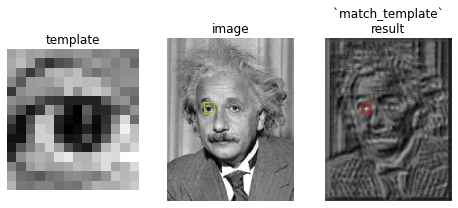

In [ ]:
# solution
from skimage.color import rgb2gray

from skimage.feature import match_template

einstenAlpha = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/einstein.png')
template = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/template.png')
einsten = rgb2gray(einstenAlpha)
template = rgb2gray(template)


result = match_template(einsten, template, pad_input=True)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]



fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(template, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(einsten, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
htemplate, wtemplate = template.shape
rect = plt.Rectangle((x*0.9, y*0.9), wtemplate, htemplate, edgecolor='y', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result, cmap='gray')
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

*   What is the output of the normalized cross-correlation function?

**Solution**

 The output of match_template function is an image with correlation coefficients. The coeficients are 0 and 1 because are normalized.
 


 *   Create a function to take the normalized cross-correlation image as input and return a bw image
*   The function should convert the normalized cross-correlation image to a thresholded image.

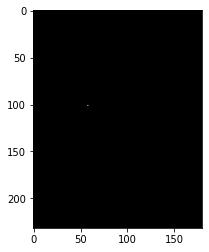

In [ ]:
# solution

def BWimage(NCC,threshold):
  binary_einstein = (result > threshold)*255
  return binary_einstein

binary_einstein = BWimage(result,0.8)
plt.imshow(binary_einstein, cmap='gray')

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

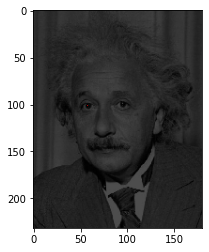

In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable


# colormap = lcm(['black', 'r'])
plt.imshow(einstenAlpha, cmap = 'gray')
plt.imshow(binary_einstein, cmap = ListedColormap(['black', 'r']), alpha = 0.7)

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

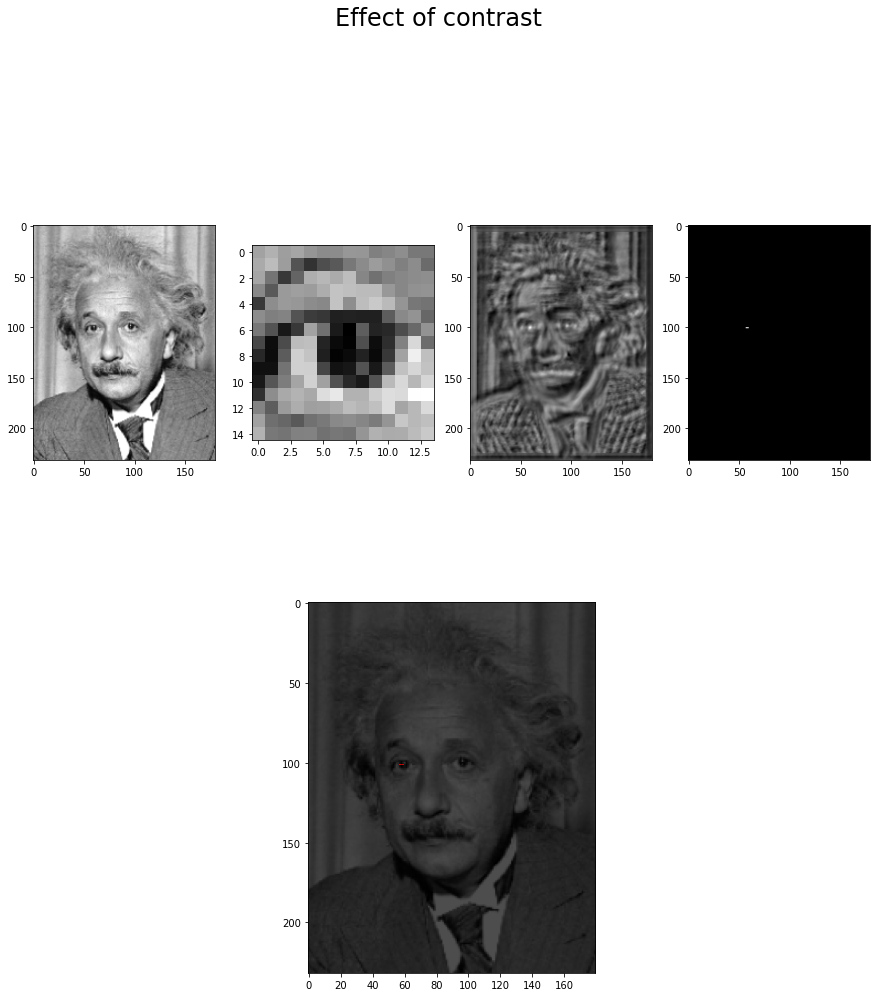

In [ ]:
# solution
einsten_br = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/einstein_br.png')
templatetwo = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/template.png')

''''Without pass to gray the images '''
#match= match_template(einsten_br,templatetwo,pad_input=False)
''''Putting to gray the images '''
einsten_br = rgb2gray(einsten_br)
templatetwo = rgb2gray(templatetwo)
'''We created the match between the image and our template'''
match= match_template(einsten_br,templatetwo,pad_input=True)
'''We calling our function created previusly'''
matchEinstein = BWimage(match,0.65)

'''Now we plot the original image, template image, normalized cross-correlation imagen and the thresholderd'''
plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2,4)
plt.suptitle('Effect of contrast', size='24', y='1.02')
#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(einsten_br,cmap='gray')
#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(templatetwo, cmap='gray')
#Picture No.3
axes_3 = plt.subplot(G[0, 2])
plt.imshow(match,cmap='gray')
#Picture No.4
axes_4 = plt.subplot(G[0, 3])
plt.imshow(matchEinstein, cmap='gray')
#Picture No.5
axes_5 = plt.subplot(G[1, :])
plt.imshow(einsten_br, cmap='gray')
plt.imshow(matchEinstein,alpha=0.7,cmap=ListedColormap(['black', 'r']))
plt.show()



*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

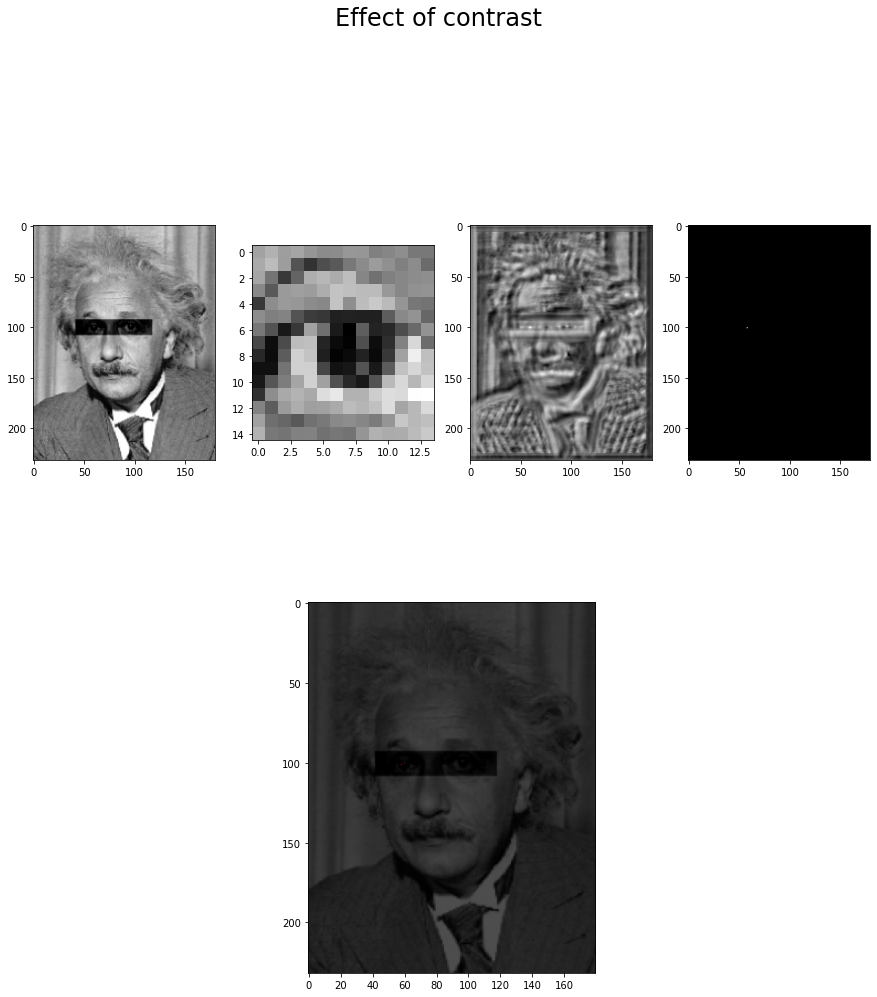

In [ ]:
# solution
einstein_mask = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/einstein_mask.png')
template_mask = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/template.png')

''''Without pass to gray the images '''
#match= match_template(einsten_br,templatetwo,pad_input=False)
''''Putting to gray the images '''
einstein_mask = rgb2gray(einstein_mask)
template_mask = rgb2gray(template_mask)
'''We created the match between the image and our template'''
match_mask= match_template(einstein_mask,template_mask,pad_input=True)
'''We calling our function created previusly'''
match_mask_Einstein = BWimage(match_mask,0.75)

'''Now we plot the original image, template image, normalized cross-correlation imagen and the thresholderd'''
plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2,4)
plt.suptitle('Effect of contrast', size='24', y='1.02')
#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(einstein_mask,cmap='gray')
#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(template_mask, cmap='gray')
#Picture No.3
axes_3 = plt.subplot(G[0, 2])
plt.imshow(match_mask,cmap='gray')
#Picture No.4
axes_4 = plt.subplot(G[0, 3])
plt.imshow(match_mask_Einstein, cmap='gray')
#Picture No.5
axes_5 = plt.subplot(G[1, :])
plt.imshow(einstein_mask, cmap='gray')
plt.imshow(match_mask_Einstein,alpha=0.7,cmap=ListedColormap(['black', 'r']))
plt.show()



*   Do you find any differences in results with respect to contrast changes? 
*   Were you able to get the location of the template in all the above experiments? Explain your inferences.

**Solution**


We don't perceive any difference with respect to contrast changes and fortunately, we could find the location of the template in all our experiments, which means that the algorithm is less influenced by changes in the contrast of the template.

...

*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

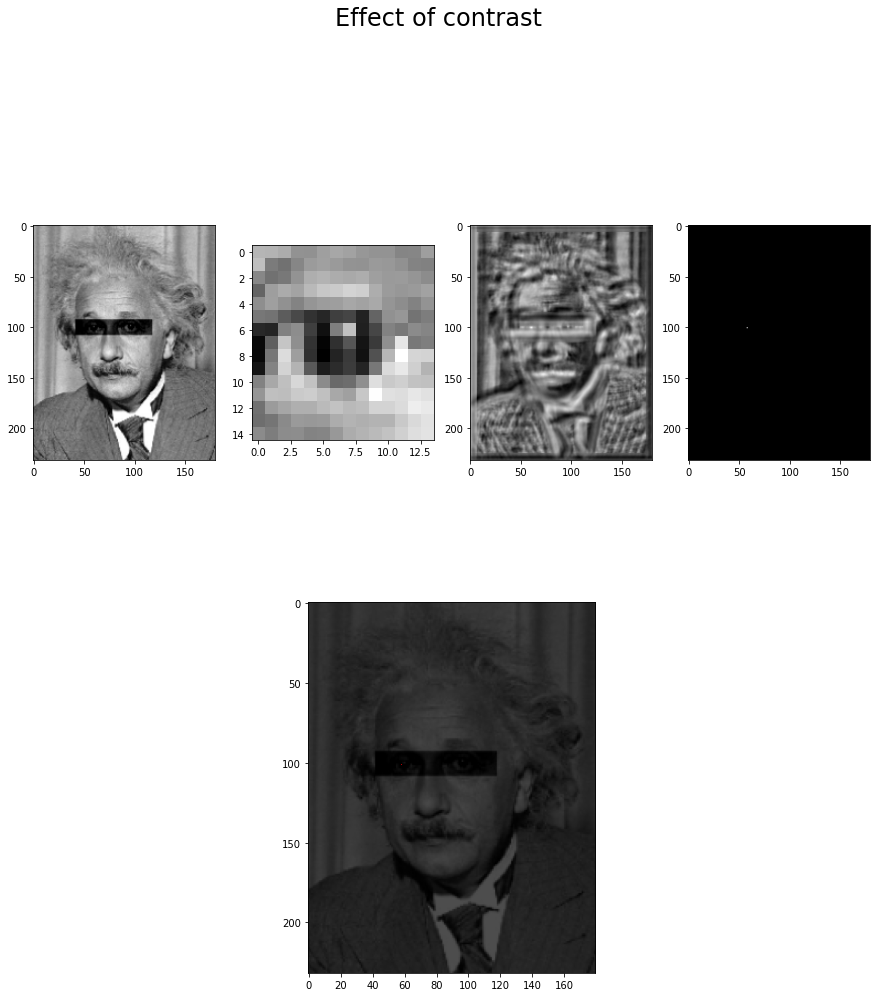

In [ ]:
# solution
einstein_mask = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/einstein_mask.png')
template_br=io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/template_br.png')
''''Without pass to gray the images '''
#match= match_template(einsten_br,templatetwo,pad_input=False)
''''Putting to gray the images '''
einstein_mask = rgb2gray(einstein_mask)
template_br = rgb2gray(template_br)
'''We created the match between the image and our template'''
match_br= match_template(einstein_mask,template_br,pad_input=True)
'''We calling our function created previusly'''
match_mask_Einstein = BWimage(match_br,0.75)

'''Now we plot the original image, template image, normalized cross-correlation imagen and the thresholded'''
plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2,4)
plt.suptitle('Effect of contrast', size='24', y='1.02')
#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(einstein_mask,cmap='gray')
#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(template_br, cmap='gray')
#Picture No.3
axes_3 = plt.subplot(G[0, 2])
plt.imshow(match_br,cmap='gray')
#Picture No.4
axes_4 = plt.subplot(G[0, 3])
plt.imshow(match_mask_Einstein, cmap='gray')
#Picture No.5
axes_5 = plt.subplot(G[1, :])
plt.imshow(einstein_mask, cmap='gray')
plt.imshow(match_mask_Einstein,alpha=0.7,cmap=ListedColormap(['black', 'r']))
plt.show()


**Solution**
When we change the contrast in the template and later apply the match with the image, we can observe that doesn't affect the matching process and for that, we could conclude that this process no it's affected to have fewer or more changes in contrast value. 

...

### Exercise #3: Effect of rotation

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

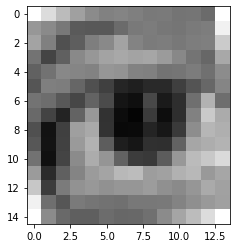

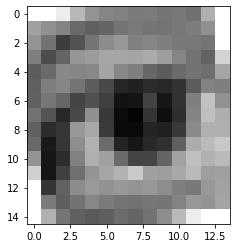

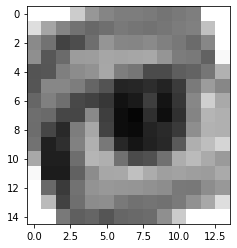

In [ ]:
# solution
from skimage.transform import warp_polar, rotate, rescale
einsten3 = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/einstein.png')
template_0 = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/template.png')

# Rotate it by 10 degrees
template10 = rotate(template_0,10)
# Rotate it by 15 degrees
template15 = rotate(template_0,15)
# Rotate it by 20 degrees
template20 = rotate(template_0,20)


plt.imshow(template10)
plt.show()

plt.imshow(template15)
plt.show()

plt.imshow(template20)
plt.show()

 Template with 10°and perform template matching

In [ ]:
'''We created the match between the image and our template'''
match_10= match_template(einsten3,template10,pad_input=True)
'''We calling our function created previusly'''
match_10_E = BWimage(match_10,0.65)

 Template with 15°and perform template matching

In [ ]:
'''We created the match between the image and our template'''
match_15= match_template(einsten3,template15,pad_input=True)
'''We calling our function created previusly'''
match_15_E = BWimage(match_10,0.65)

 Template with 20°and perform template matching

In [ ]:
'''We created the match between the image and our template'''
match_20= match_template(einsten3,template20,pad_input=True)
'''We calling our function created previusly'''

def B20image(NCC,threshold):
  thresholdEinstein = (result > threshold)*255
  return thresholdEinstein


match_20_E = B20image(match_20,0.65)

Now, we can see the difference between all the angles in the templates

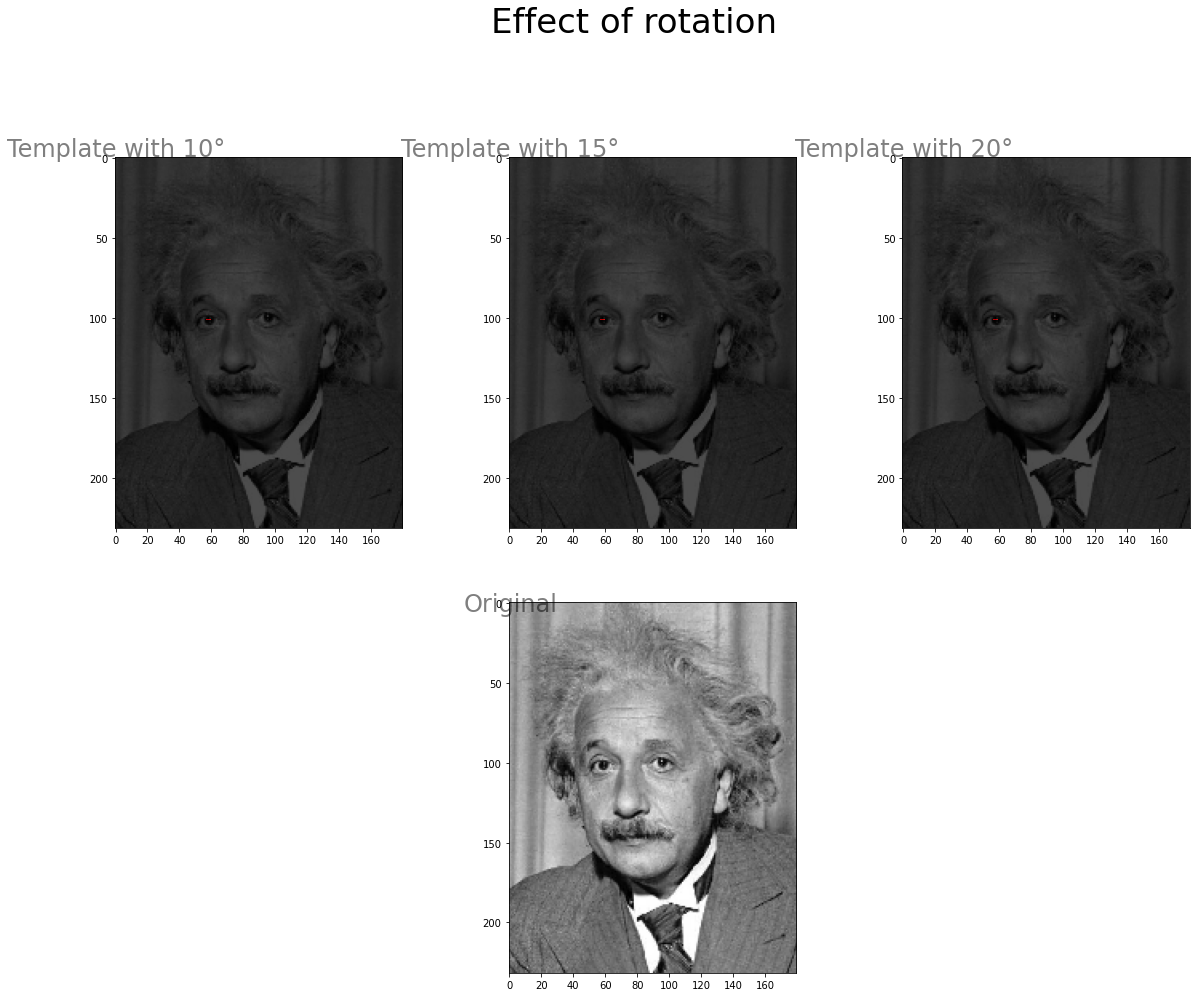

In [ ]:
#Plot all the templates in different angles
plt.figure(figsize=(20,15))
G = gridspec.GridSpec(2,3)
plt.suptitle('Effect of rotation', size='34', y='1.02')
#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(einsten3, cmap='gray')
plt.imshow(match_10_E,alpha=0.7,cmap=ListedColormap(['black', 'r']))
plt.text(0.5, -5.5, 'Template with 10°', ha='center', va='center', size=24, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(einsten3, cmap='gray')
plt.imshow(match_15_E,alpha=0.7,cmap=ListedColormap(['black', 'r']))
plt.text(0.5, -5.5, 'Template with 15°', ha='center', va='center', size=24, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[0, 2])
plt.imshow(einsten3, cmap='gray')
plt.imshow(match_20_E,alpha=0.7,cmap=ListedColormap(['black', 'r']))
plt.text(0.5, -5.5, 'Template with 20°', ha='center', va='center', size=24, alpha=.5)
#Picture No.4
axes_4 = plt.subplot(G[1, :])
plt.imshow(einsten3, cmap='gray')
plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=24, alpha=.5)
plt.show()

*   What do you infer with respect to rotation?

**Solution**
We can conclude that the rotation in the template doesn't influence the match. As shown we can appreciate previously, we change the angle of the template for 10°,15°, and 20°, then we calculated the match with the Einstein image and the result was the same in all cases.

...

## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Read the template ('person_template.png') from the images folder
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


The hog() function takes 6 parameters as input:

- Persson: The target image that we want to apply HOG feature extraction.
- Orientations: Number of bins in the histogram we want to create, in this case we can use 8.
- Pixels_per_cell: Determines the size of the cell, as it was mentioned in class, it is 8x8.
- Cells_per_block: Number of cells per block, will be 2x2 as was mentioned in the lecture.
- Visualize: A boolean whether to return the image of the HOG, we set it to True so we can show the image.
- Multichannel: We set it to True to tell the function that the last dimension is considered as a color channel, instead of spatial.

<function matplotlib.pyplot.show>

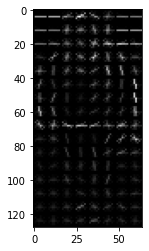

In [ ]:
# solution

from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

''' When we implement the HOG algorthim we have two options. The first is if you have a wide image, then crop 
the image to the specific part in which you want to apply HOG feature extraction, and then resize it to the appropriate shape.'''


person = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/person_template.bmp')


person_resize = resize(person, (128, 64))

fd, hog_image = hog(person_resize, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)


plt.imshow(hog_image,cmap='gray')
plt.show

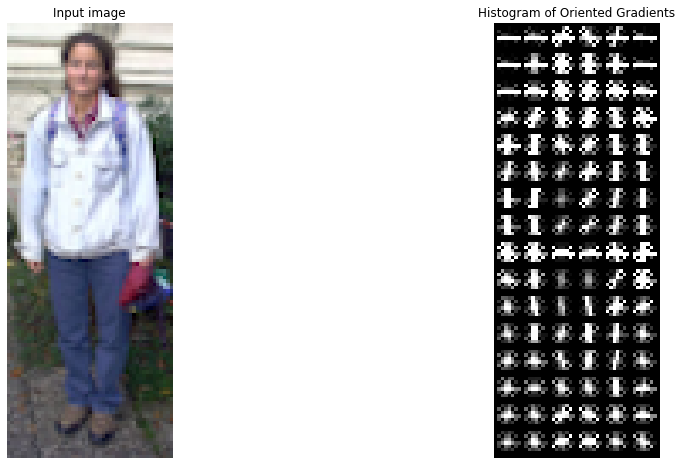

In [ ]:
# In the second method we do not change the size and apply the algorithm directly.

image = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/person_template.bmp')


fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

*   Explain the algorithm behind HOG



**Solution**
The focal point of the algorithm HOG is the structure of the target object. This algorithm extracts the information of the edge and orientation magnitude.

Mainly the algorithm divides the image into small parts and then the gradient and orientation of each cell are calculated.

we know that to calculate the gradient in the x and y direction is basically small changes in the x and y directions, so we convolve two simple filters on the image. 

For the previus step we use the next formula:

![Magnitude](https://www.thepythoncode.com/media/articles/hog-feature-extraction-in-python/magnitude-formula.png)

Later to compute the gradient direction we use the next formula:


![Direction](https://www.thepythoncode.com/media/articles/hog-feature-extraction-in-python/orientation-formula.png
)



...

*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

Is necessary to preprocess the image to obtain square blocks of histograms which are used for a fast HOG calculation. 
...

*   What do you infer from the parameters


**Solution**

* Orientation is the Number of orientation bins and how many we can split the angle value in the histogram.

* pixels_per_cell is the number of cells that we group when is created the blocks to compute the values of magnitude and orientation.


*   Change the value of orientation (try at least 3 different values) and compare the hog_image using matplotlib subplot.

In [ ]:
# Orientation with a low value
fd, hog_image1 = hog(person_resize, orientations=2, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

# Orientation with a low value
fd, hog_image2 = hog(person_resize, orientations=6, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

# Orientation with a high value
fd, hog_image3 = hog(person_resize, orientations=12, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

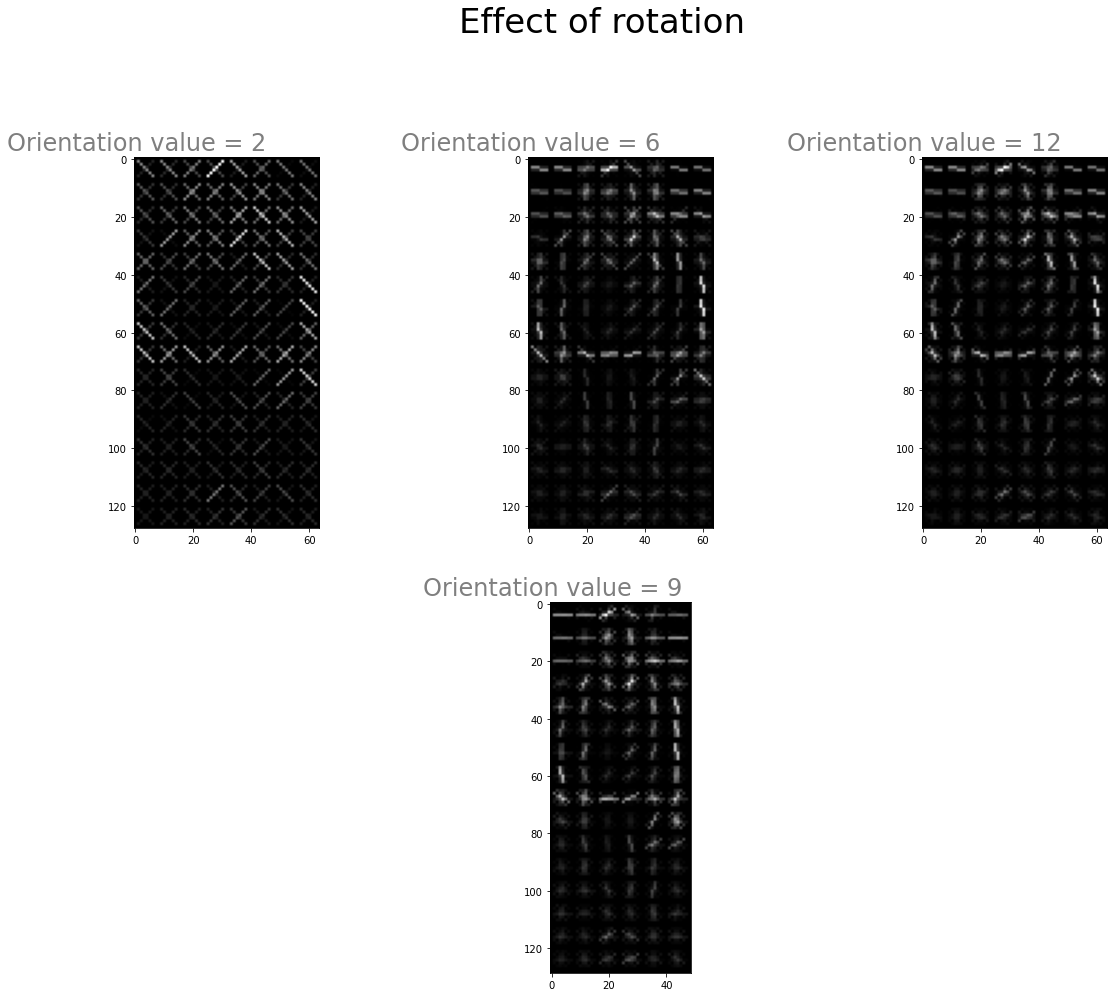

In [ ]:
#Plot all the templates in different angles
plt.figure(figsize=(20,15))
G = gridspec.GridSpec(2,3)
plt.suptitle('Effect of rotation', size='34', y='1.02')
#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(hog_image1, cmap='gray')
plt.text(0.5, -5.5, 'Orientation value = 2', ha='center', va='center', size=24, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(hog_image2, cmap='gray')
plt.text(0.5, -5.5, 'Orientation value = 6', ha='center', va='center', size=24, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[0, 2])
plt.imshow(hog_image3, cmap='gray')
plt.text(0.5, -5.5, 'Orientation value = 12', ha='center', va='center', size=24, alpha=.5)
#Picture No.4
axes_4 = plt.subplot(G[1, :])
plt.imshow(hog_image, cmap='gray')
plt.text(0.5, -5.5, 'Orientation value = 9', ha='center', va='center', size=24, alpha=.5)
plt.show()

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution**

The feature descriptor output contains a vector dimension which is calculated by the formula n_blocks * cells_per_block * n_bins

where n_bins is number of histogram binning, n_blocks is number of blocks in image and cells_per_block number of cells in a block
example:


Image : 64x128x3=24576
HOG=n_blocks * cells_per_block * n_bins
105x4x9=3780 (6.5x smaller)

...

### Exercise #2: Pedestrian detection
*   For the 'person_template.png', try different values for the parameters and get the optimal value.
*   The hog descriptor obtained would be used in detecting pedestrians.
*   Visualize the original image and the hog_image using matplotlib. 
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot along with the original image.

In [ ]:
# solution

dataset = io.imread_collection('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/pedestrians/*.bmp')
template = io.imread(r'/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab4/P2_1_template_matching_HOG/images/person_template.bmp')

# Defining our step size and the window shape
SizeW = 5 
Wx = np.shape(template)[0]
WY = np.shape(template)[1]

# Empty lists are defined:
dot = [] 
euclid = []


# This one returns template's feature descriptor:
#template = resize(template, (128, 64))
template = feature.hog(template, orientations = 9, pixels_per_cell = (6,6), cells_per_block = (3,3))

# Template HOG
#pers_template_resize = resize(person_template, (128*4, 64*4))
#fd, desctemp = hog(template, orientations=9, pixels_per_cell=(8, 8),
 #               	cells_per_block=(2, 2), visualize=True, multichannel=True)


#For each of the images:

for img in dataset:
    #img = resize(img, (128, 64))
    ShapeX = np.shape(img)[0]
    ShapeY = np.shape(img)[1]
    euclImg = []  
    dotImage = []
  
    # We compute for each of the 5 pixels along y axis:
    for i in range(0, ShapeX - Wx, SizeW):
        RowEuclidean = []
        RowDot = []
      
        # Each of the 5 pixels along x axis:
  
        for j in range(0, ShapeY - WY, SizeW):

            # In order to obtain image slice:

            imslice = img[i:i+Wx, j:j+WY]

            # Obtaining HOG image (HOG) and  feature descriptors for slices

            fd, HOG = feature.hog(imslice, visualize = True, orientations = 9, pixels_per_cell = (6,6), cells_per_block = (3,3))

            # Calculation of dot product and Euclidean Distances of slices

            EclDist = np.linalg.norm(template-fd)
            dotProd = np.dot(template, fd)

            RowEuclidean.append(EclDist)
            RowDot.append(dotProd)
            
        dotImage.append(RowDot)    
        euclImg.append(RowEuclidean)
        
        
    euclid.append(euclImg)
    dot.append(dotImage)

# We will be obtaining optimal(minimum) euclidean values for each of the images

MinEuclidean = np.array(euclid)
minEuclidean = [np.argmin(MinEuclidean[index, :, :]) 
for index, array in enumerate(MinEuclidean)]

# optimal(maximum) dot product values of the each image

npDot = np.array(dot)
maxDot = [np.argmax(npDot[index, :, :]) for index, array in enumerate(npDot)]    

In [ ]:
# For each window with the optimum value

for i, value in enumerate(minEuclidean):

    # Finding the window's upper-left corner location 

    xPos = (value//len(RowDot)) * SizeW
    yPos = (value%len(RowDot)) * SizeW    
    fig, axs = plt.subplots(1, 5, figsize=(20, 20))

    axs[2].imshow(dataset[i], cmap ='gray')
    axs[2].set_title(f'Pedestrian No{i}')
    
    # Value of rectangle for min euclidean 

    rectangle1 = cv2.rectangle(dataset[i],(yPos, xPos),(yPos+WY, xPos+Wx),(86,255,15),2)
    axs[0].imshow(rectangle1, cmap ='gray')
    axs[0].set_title('Euclidean distance')
    
    # Rectangle of min euclidean values in HOG image

    fd, HOG = feature.hog(dataset[i], visualize = True, orientations = 9, pixels_per_cell = (6,6), cells_per_block = (3,3))
    rectangle2 = cv2.rectangle(HOG,(yPos, xPos),(yPos+WY, xPos+Wx),(255,255,255),2)
    axs[1].imshow(rectangle2, cmap ='gray')
    axs[1].set_title('HOG Euclidean')
    
    # dot product maximum window's upper left corner position

    xPos = (maxDot[i]//len(RowDot)) * SizeW
    yPos = (maxDot[i]%len(RowDot)) * SizeW    
    
    # Rectangle of max values of dot product

    rectangle3 = cv2.rectangle(dataset[i],(yPos, xPos),(yPos+WY, xPos+Wx),(86,255,15),2)
    axs[3].imshow(rectangle3, cmap ='gray')
    axs[3].set_title('Dot distance')
    
    # Rectange of max dot product values in HOG image

    fd, HOG = feature.hog(dataset[i], visualize = True, orientations = 9, pixels_per_cell = (6,6), cells_per_block = (3,3))
    rectangle4 = cv2.rectangle(HOG,(yPos, xPos),(yPos+WY, xPos+Wx),(255,255,255),2)
    axs[4].imshow(rectangle4, cmap ='gray')
    axs[4].set_title('HOG Dot')

Output hidden; open in https://colab.research.google.com to view.

*   Count the failures and discuss the possible reason for failure for each image.

**Solution**
We can perceive that in some cases where the detection failure was presented is because the distance of the target is too far, the solution for that is applies a resize in that kind of image and process again.

...

*   What is the failure rate for the dot product and what is the failure rate for the euclidean distance?

**Solution**


For both distance the failure rate is 5 over 14.


*   What is the difference between using dot product and euclidean distance?

**Solution**
The Euclidean distance is equal to the square root of the dot product.. For example, let's say the points are (3,5) and (6,9). The Euclidean distance is √(3−6)2+(5−9)2, which is equal to √9+16, or 5.


The difference between both ways of measuring is the methodology, they have the same purpose. Dot is a projection and Euclidean is the magnitude, geometrically they are equal.

...

*   Compare template matching and HOG. 
*   What are the advantages of HOG over template matching algorithm.

**Solution**

Template  Matching  uses  simply pixel-based  cross-correlation  matches  which  is  easy  to implement.  It  only  works well  when  the template image  is cropped  from  the  original  image  otherwise  it  shows  poor results  in  object  detection.  HOG  method  uses  feature descriptors  to  detect  images.  In  this  method,  the  cross-correlation  between  the  template  and  feature  descriptor  is used. It requires less time to run the detection process. Now,  it  is  concluded  that  the  implementation  of  HOG based method is comparatively complex but it shows optimum results based on both detection accuracy and elapsed time


If we compare both methods we can infer that:
- Using template matching can be more practical and easy to use, on the other hand HOG allows us to detect images with low resolution, brightness and in some cases depending on the background we can detect objects that are seen far away, something that in the first method is problematic .
-Template matching works by correlation coincidences while HOG does it with feature descriptors, managing to work with low-quality images.

...


---

## **End of P2_1: Template Matching and HOG**
Deadline for P2_1 submission in CampusVirtual is: **Monday, the 1st of November, 2021**
